In [1]:
# Install openpyxl (required for reading Excel files)
!pip install openpyxl

# Import libraries
import pandas as pd
import numpy as np


In [2]:
file_path = "cleaned_student_dataset_random (1).xlsx"  # yahi naam Files panel se copy karke daalna

df = pd.read_excel(file_path)
df.head()


,Regd No.,Cgpa,Total_Courses,PASS,E,F,R,G,I,M,Current_Attendance,Delivered,Attended
0,12305325,4.54,16,13,3,0,0,0,0,0,80,66,49
1,12312046,3.63,16,11,5,0,0,0,0,0,81,117,102
2,12315973,5.27,16,15,1,0,0,0,0,0,86,100,56
3,12308098,3.98,16,12,4,0,0,0,0,0,63,124,119
4,12315402,7.63,16,16,0,0,0,0,0,0,79,140,97


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Regd No.            8763 non-null   object 
 1   Cgpa                8763 non-null   float64
 2   Total_Courses       8763 non-null   int64  
 3   PASS                8763 non-null   int64  
 4   E                   8763 non-null   int64  
 5   F                   8763 non-null   int64  
 6   R                   8763 non-null   int64  
 7   G                   8763 non-null   int64  
 8   I                   8763 non-null   int64  
 9   M                   8763 non-null   int64  
 10  Current_Attendance  8763 non-null   int64  
 11  Delivered           8763 non-null   int64  
 12  Attended            8763 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 890.1+ KB


In [4]:
df.columns


Index(['Regd No.', 'Cgpa', 'Total_Courses', 'PASS', 'E', 'F', 'R', 'G', 'I',
       'M', 'Current_Attendance', 'Delivered', 'Attended'],
      dtype='object')

In [5]:
df.isna().sum()


,0
Regd No.,0
Cgpa,0
Total_Courses,0
PASS,0
E,0
F,0
R,0
G,0
I,0
M,0


In [6]:
import pandas as pd

df = pd.read_excel("cleaned_student_dataset_random (1).xlsx")
df.head()


,Regd No.,Cgpa,Total_Courses,PASS,E,F,R,G,I,M,Current_Attendance,Delivered,Attended
0,12305325,4.54,16,13,3,0,0,0,0,0,80,66,49
1,12312046,3.63,16,11,5,0,0,0,0,0,81,117,102
2,12315973,5.27,16,15,1,0,0,0,0,0,86,100,56
3,12308098,3.98,16,12,4,0,0,0,0,0,63,124,119
4,12315402,7.63,16,16,0,0,0,0,0,0,79,140,97


In [7]:
df["attendance_pct_calc"] = (df["Attended"] / df["Delivered"]) * 100
df["missed_classes"] = df["Delivered"] - df["Attended"]
df["pass_ratio"] = df["PASS"] / df["Total_Courses"]
df["fail_count"] = df["F"] + df["R"] + df["M"]

df["performance_score"] = (
    df["Cgpa"] * 1.5 +
    df["PASS"] * 0.5 -
    df["fail_count"] * 1.0
)


In [8]:
# Select only useful numeric features for clustering
feature_cols = [
    "Cgpa",
    "Total_Courses",
    "PASS",
    "fail_count",
    "attendance_pct_calc",
    "missed_classes",
    "pass_ratio",
    "performance_score"
]

X = df[feature_cols]
X.head()


,Cgpa,Total_Courses,PASS,fail_count,attendance_pct_calc,missed_classes,pass_ratio,performance_score
0,4.54,16,13,0,74.242424,17,0.8125,13.310
1,3.63,16,11,0,87.179487,15,0.6875,10.945
2,5.27,16,15,0,56.000000,44,0.9375,15.405
3,3.98,16,12,0,95.967742,5,0.7500,11.970
4,7.63,16,16,0,69.285714,43,1.0000,19.445


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]   # show first 5 rows after scaling


array([[-0.61728042,  0.16252374, -0.16075373, -0.17488296, -0.01406707,
        -0.54917711, -0.17766503, -0.35682494],
       [-1.10242926,  0.16252374, -0.82210816, -0.17488296,  0.87246695,
        -0.64927777, -0.83820562, -0.8403414 ],
       [-0.22809508,  0.16252374,  0.5006007 , -0.17488296, -1.2641599 ,
         0.80218172,  0.48287556,  0.0714909 ],
       [-0.91583355,  0.16252374, -0.49143094, -0.17488296,  1.4746969 ,
        -1.14978104, -0.50793532, -0.63078353],
       [ 1.03009312,  0.16252374,  0.83127791, -0.17488296, -0.35373396,
         0.75213139,  0.81314586,  0.89745559]])

In [10]:
X_scaled.shape


(8763, 8)

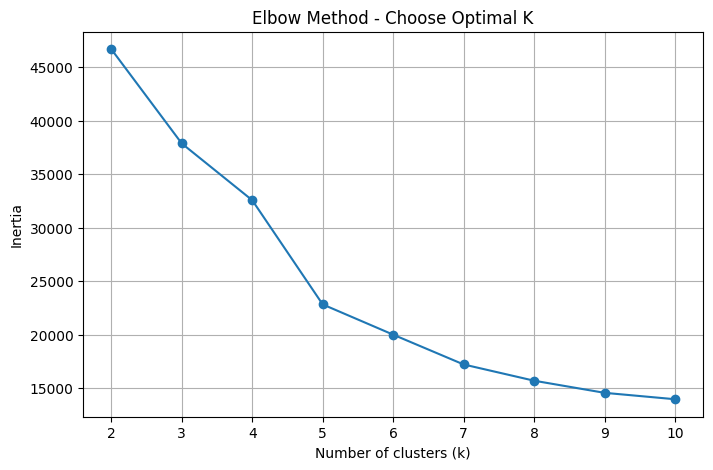

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K_range = range(2, 11)  # Trying clusters from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(list(K_range), inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method - Choose Optimal K")
plt.grid(True)
plt.show()


In [12]:
from sklearn.cluster import KMeans

k = 10  # number of clusters you decided
kmeans_final = KMeans(n_clusters=k, random_state=42, n_init="auto")

# Fit model & get cluster labels
df["cluster"] = kmeans_final.fit_predict(X_scaled)


In [13]:
df["cluster"].value_counts()


,count
cluster,
2,2093
1,2068
8,1450
6,1290
4,753
0,540
7,272
9,170
3,91


In [14]:
df.groupby("cluster")[[
    "Cgpa",
    "PASS",
    "fail_count",
    "attendance_pct_calc",
    "missed_classes",
    "pass_ratio",
    "performance_score"
]].mean()


,Cgpa,PASS,fail_count,attendance_pct_calc,missed_classes,pass_ratio,performance_score
cluster,,,,,,,
0,2.662519,8.024074,0.020370,63.105946,42.100000,0.502392,7.985444
1,7.284299,15.753868,0.004352,86.200703,13.203578,0.984233,18.799030
2,7.087415,15.638796,0.002867,61.505698,44.062112,0.977277,18.447654
3,1.006374,2.681319,9.098901,66.037450,36.615385,0.168151,-6.248681
4,3.181102,9.373174,0.029216,86.380816,12.962815,0.587174,9.429024
5,8.880000,12.000000,0.000000,72.347263,29.833333,1.000000,19.320000
6,4.732705,12.809302,0.014729,61.743225,44.820930,0.800420,13.488981
7,6.709743,13.610294,0.011029,74.628743,28.224265,0.920921,16.858732
8,5.063221,13.493793,0.013103,85.614454,13.746897,0.843015,14.328624


In [15]:
df.to_excel("student_clusters_final.xlsx", index=False)


In [16]:
df.groupby("cluster")[[
    "Cgpa",
    "PASS",
    "fail_count",
    "attendance_pct_calc",
    "missed_classes",
    "pass_ratio",
    "performance_score"
]].mean()


,Cgpa,PASS,fail_count,attendance_pct_calc,missed_classes,pass_ratio,performance_score
cluster,,,,,,,
0,2.662519,8.024074,0.020370,63.105946,42.100000,0.502392,7.985444
1,7.284299,15.753868,0.004352,86.200703,13.203578,0.984233,18.799030
2,7.087415,15.638796,0.002867,61.505698,44.062112,0.977277,18.447654
3,1.006374,2.681319,9.098901,66.037450,36.615385,0.168151,-6.248681
4,3.181102,9.373174,0.029216,86.380816,12.962815,0.587174,9.429024
5,8.880000,12.000000,0.000000,72.347263,29.833333,1.000000,19.320000
6,4.732705,12.809302,0.014729,61.743225,44.820930,0.800420,13.488981
7,6.709743,13.610294,0.011029,74.628743,28.224265,0.920921,16.858732
8,5.063221,13.493793,0.013103,85.614454,13.746897,0.843015,14.328624


In [17]:
intervention_map = {
    1: "Advanced learning resources, competitions, leadership roles",
    2: "Attendance reminders, time management guidance, light academic monitoring",
    7: "Skill-building workshops, project-based learning, internship preparation",
    8: "Concept reinforcement, topic-wise practice, small doubt-clearing groups",
    6: "Mentoring sessions, attendance tracking, structured study plan",
    4: "Remedial classes, weekly concept quizzes, guided study materials",
    0: "Counselling, attendance monitoring, parental communication, motivation sessions",
    9: "1-on-1 tutoring, simplified materials, foundational concept rebuilding",
    3: "Immediate counselling, academic recovery plan, weekly progress meetings",
    5: "Fast-track courses, research projects, advanced electives"
}


In [18]:
df["intervention"] = df["cluster"].map(intervention_map)
df[["cluster", "intervention"]].head()


,cluster,intervention
0,8,"Concept reinforcement, topic-wise practice, sm..."
1,4,"Remedial classes, weekly concept quizzes, guid..."
2,6,"Mentoring sessions, attendance tracking, struc..."
3,8,"Concept reinforcement, topic-wise practice, sm..."
4,2,"Attendance reminders, time management guidance..."


In [19]:
df.to_excel("student_clusters_with_interventions.xlsx", index=False)


In [20]:
df[["Cgpa","attendance_pct_calc","cluster","intervention"]].sample(10)


,Cgpa,attendance_pct_calc,cluster,intervention
2059,4.65,97.350993,8,"Concept reinforcement, topic-wise practice, sm..."
7991,4.58,67.391304,6,"Mentoring sessions, attendance tracking, struc..."
7876,7.69,56.557377,2,"Attendance reminders, time management guidance..."
8260,4.71,50.400000,6,"Mentoring sessions, attendance tracking, struc..."
1362,5.40,50.354610,6,"Mentoring sessions, attendance tracking, struc..."
8257,4.00,70.857143,6,"Mentoring sessions, attendance tracking, struc..."
675,6.60,87.500000,1,"Advanced learning resources, competitions, lea..."
962,6.96,89.655172,1,"Advanced learning resources, competitions, lea..."
3190,5.08,58.252427,6,"Mentoring sessions, attendance tracking, struc..."
8368,5.40,75.581395,6,"Mentoring sessions, attendance tracking, struc..."


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")  # makes visuals clean


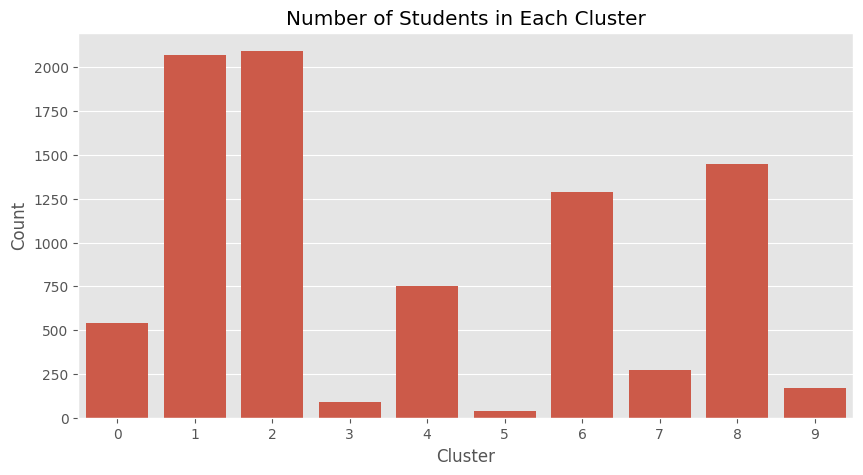

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["cluster"])
plt.title("Number of Students in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


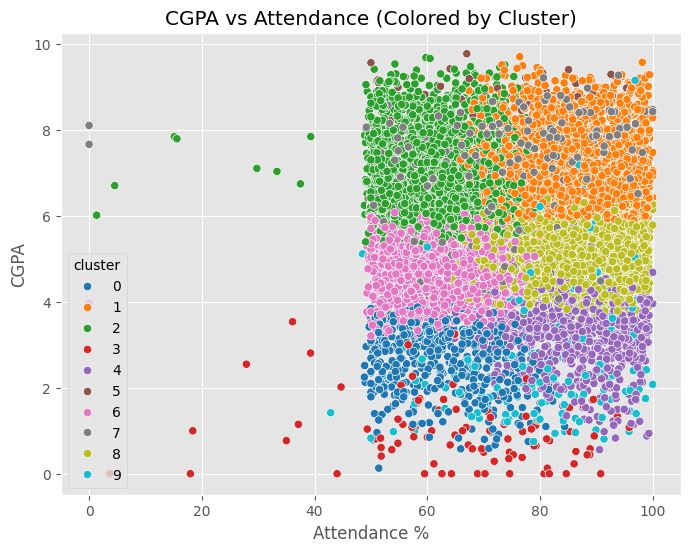

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["attendance_pct_calc"],
    y=df["Cgpa"],
    hue=df["cluster"],
    palette="tab10"
)
plt.title("CGPA vs Attendance (Colored by Cluster)")
plt.xlabel("Attendance %")
plt.ylabel("CGPA")
plt.show()


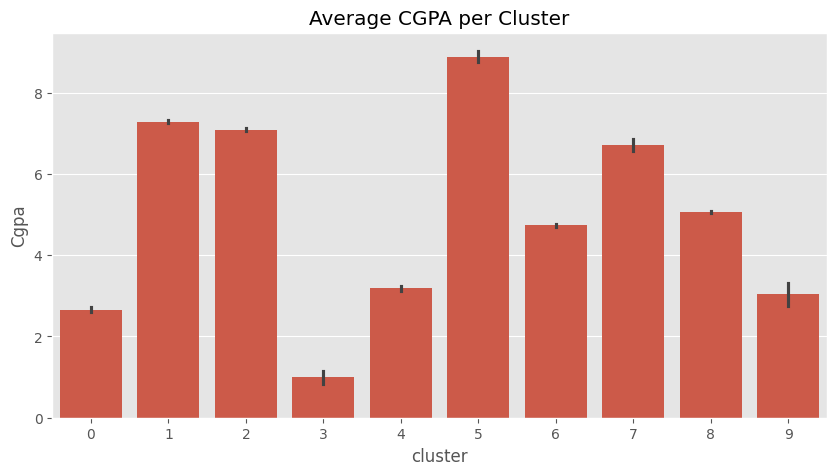

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["cluster"], y=df["Cgpa"])
plt.title("Average CGPA per Cluster")
plt.show()


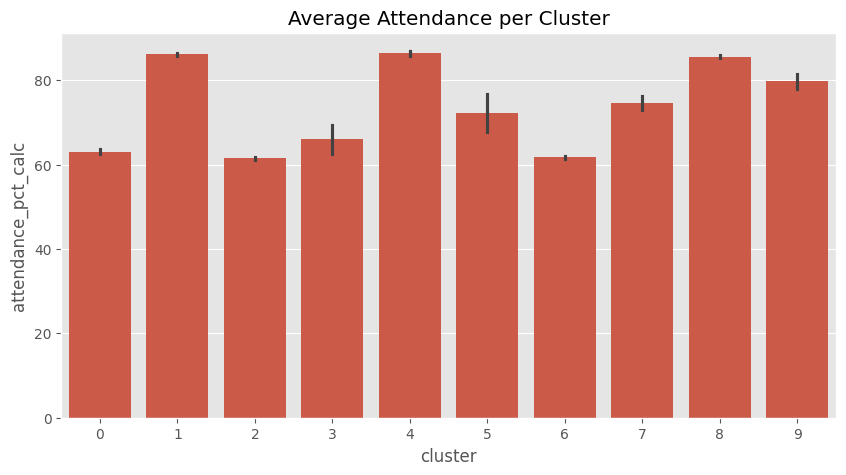

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["cluster"], y=df["attendance_pct_calc"])
plt.title("Average Attendance per Cluster")
plt.show()


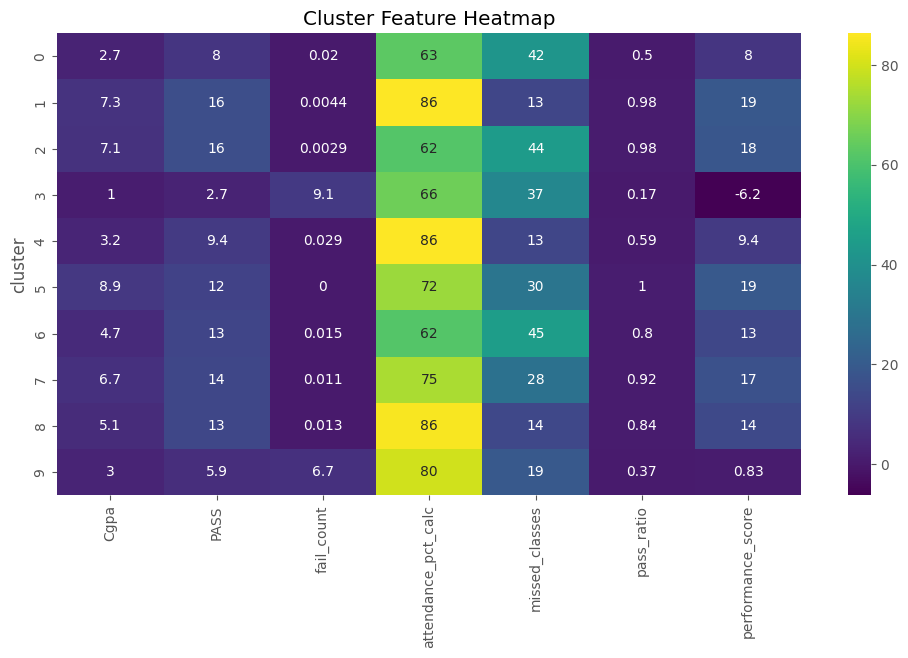

In [26]:
cluster_means = df.groupby("cluster")[[
    "Cgpa",
    "PASS",
    "fail_count",
    "attendance_pct_calc",
    "missed_classes",
    "pass_ratio",
    "performance_score"
]].mean()

plt.figure(figsize=(12,6))
sns.heatmap(cluster_means, annot=True, cmap="viridis")
plt.title("Cluster Feature Heatmap")
plt.show()


In [27]:
cluster_means


,Cgpa,PASS,fail_count,attendance_pct_calc,missed_classes,pass_ratio,performance_score
cluster,,,,,,,
0,2.662519,8.024074,0.020370,63.105946,42.100000,0.502392,7.985444
1,7.284299,15.753868,0.004352,86.200703,13.203578,0.984233,18.799030
2,7.087415,15.638796,0.002867,61.505698,44.062112,0.977277,18.447654
3,1.006374,2.681319,9.098901,66.037450,36.615385,0.168151,-6.248681
4,3.181102,9.373174,0.029216,86.380816,12.962815,0.587174,9.429024
5,8.880000,12.000000,0.000000,72.347263,29.833333,1.000000,19.320000
6,4.732705,12.809302,0.014729,61.743225,44.820930,0.800420,13.488981
7,6.709743,13.610294,0.011029,74.628743,28.224265,0.920921,16.858732
8,5.063221,13.493793,0.013103,85.614454,13.746897,0.843015,14.328624


In [28]:
!pip install streamlit streamlit-option-menu pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 133.6 MB/s eta 0:00:00


In [29]:
%%writefile dashboard.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(page_title="Student Clustering Dashboard", layout="wide")

st.title("🎓 Student Performance Clustering Dashboard")

uploaded_file = st.file_uploader("Upload your dataset (Excel)", type=["xlsx"])

if uploaded_file:
    df = pd.read_excel(uploaded_file)

    st.subheader("Dataset Preview")
    st.dataframe(df.head())

    # Cluster distribution
    st.subheader("Cluster Distribution")
    cluster_counts = df["cluster"].value_counts().sort_index()
    st.bar_chart(cluster_counts)

    # Feature means heatmap
    st.subheader("Cluster Feature Summary")
    feature_cols = ["Cgpa","PASS","fail_count","attendance_pct_calc",
                    "missed_classes","pass_ratio","performance_score"]

    cluster_means = df.groupby("cluster")[feature_cols].mean()
    st.dataframe(cluster_means)

    st.subheader("Heatmap")
    fig, ax = plt.subplots(figsize=(10,5))
    sns.heatmap(cluster_means, annot=True, cmap="coolwarm", ax=ax)
    st.pyplot(fig)

    # Student selector
    st.subheader("Student Details & Intervention")

    student_id = st.selectbox("Choose Regd No.", df["Regd No."].unique())

    student_row = df[df["Regd No."] == student_id].iloc[0]

    st.write("### Student Information")
    st.write(student_row[["Cgpa","attendance_pct_calc","cluster","intervention"]])


Writing dashboard.py


In [30]:
!pip install pyngrok
from pyngrok import ngrok

ngrok.set_auth_token("36VzmVlwi8dY741nckQ5hoPdFEl_6cAHmanPUvmnqD7gdc1xL")


In [31]:
!streamlit run dashboard.py &

# Expose Streamlit app on port 8501
public_url = ngrok.connect(8501)
public_url





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.121.16.33:8501

  Stopping...


<NgrokTunnel: "https://tenisha-sprayful-camilo.ngrok-free.dev" -> "http://localhost:8501">

In [32]:
from pyngrok import ngrok

# Connect to port 8501 where Streamlit is running
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://tenisha-sprayful-camilo.ngrok-free.dev" -> "http://localhost:8501">

In [33]:
!kill -9 $(lsof -t -i:8501)


kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]


In [34]:
# Install packages
!pip install streamlit pyngrok -q

# Import
from pyngrok import ngrok

# Kill any previous tunnels
ngrok.kill()

# Start a new ngrok tunnel
public_url = ngrok.connect(8501)
print("Your Streamlit app will be available at:", public_url)

# Run Streamlit
!streamlit run dashboard.py --server.address=0.0.0.0 --server.port=8501


Your Streamlit app will be available at: NgrokTunnel: "https://tenisha-sprayful-camilo.ngrok-free.dev" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  URL: http://0.0.0.0:8501

2025-12-08 09:45:17.569 Serialization of dataframe to Arrow table was unsuccessful. Applying automatic fixes for column types to make the dataframe Arrow-compatible.
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/streamlit/dataframe_util.py", line 829, in convert_pandas_df_to_arrow_bytes
    table = pa.Table.from_pandas(df)
            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "pyarrow/table.pxi", line 4751, in pyarrow.lib.Table.from_pandas
  File "/usr/local/lib/python3.12/dist-packages/pyarrow/pandas_compat.py", line 625, in dataframe_to_arrays
    arrays = [convert_column(c, f)
              ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pyarrow/pandas_compat.py", line 612, in convert_column
    raise e
  File "/usr/local/

In [35]:
import numpy as np

def generate_certifications(cgpa):
    if cgpa >= 8.0:
        return np.random.randint(4, 11)    # 4–10
    elif cgpa >= 6.5:
        return np.random.randint(2, 7)     # 2–6
    elif cgpa >= 5.0:
        return np.random.randint(1, 4)     # 1–3
    else:
        return np.random.randint(0, 2)     # 0–1

df["certifications_completed"] = df["Cgpa"].apply(generate_certifications)


In [36]:
def generate_national_awards(cgpa):
    # 97% chance zero
    if np.random.rand() < 0.97:
        return 0

    # 3% chance at least 1 award
    if np.random.rand() < 0.03:
        return 1

    # <1% chance for 2 awards
    if cgpa >= 8.0 and np.random.rand() < 0.01:
        return 2

    return 1

df["national_awards"] = df["Cgpa"].apply(generate_national_awards)


In [38]:
df.columns.tolist()


['Regd No.',
 'Cgpa',
 'Total_Courses',
 'PASS',
 'E',
 'F',
 'R',
 'G',
 'I',
 'M',
 'Current_Attendance',
 'Delivered',
 'Attended',
 'attendance_pct_calc',
 'missed_classes',
 'pass_ratio',
 'fail_count',
 'performance_score',
 'cluster',
 'intervention',
 'certifications_completed',
 'national_awards']

In [39]:
import numpy as np

def generate_prizes(cgpa):
    # Base probability distribution: 70% = 0 prizes, 20% = 1, 10% = 2
    base = np.random.choice([0, 1, 2], p=[0.7, 0.2, 0.1])

    # High CGPA students slightly more active (optional small boost)
    if cgpa >= 7.5:
        return min(base + np.random.choice([0,1], p=[0.6, 0.4]), 5)
    else:
        return base

df["extra_curricular_prizes"] = df["Cgpa"].apply(generate_prizes)


In [40]:
df.columns.tolist()


['Regd No.',
 'Cgpa',
 'Total_Courses',
 'PASS',
 'E',
 'F',
 'R',
 'G',
 'I',
 'M',
 'Current_Attendance',
 'Delivered',
 'Attended',
 'attendance_pct_calc',
 'missed_classes',
 'pass_ratio',
 'fail_count',
 'performance_score',
 'cluster',
 'intervention',
 'certifications_completed',
 'national_awards',
 'extra_curricular_prizes']

In [41]:
df[[
    "Cgpa",
    "certifications_completed",
    "extra_curricular_prizes",
    "national_awards"
]].head(20)


,Cgpa,certifications_completed,extra_curricular_prizes,national_awards
0,4.54,0,0,0
1,3.63,1,0,0
2,5.27,1,1,0
3,3.98,1,0,0
4,7.63,3,1,0
5,8.58,4,1,0
6,6.54,4,0,0
7,7.81,6,0,1
8,8.27,7,2,0
9,7.75,2,1,0


In [42]:
import numpy as np

def realistic_attendance(cgpa):
    if cgpa >= 8.0:
        return np.random.randint(80, 101)   # High performers: 80–100%
    elif cgpa >= 7.0:
        return np.random.randint(70, 95)    # Good students
    elif cgpa >= 6.0:
        return np.random.randint(60, 90)
    elif cgpa >= 5.0:
        return np.random.randint(50, 80)
    else:
        return np.random.randint(35, 65)    # Weak performers

df["attendance_pct_calc"] = df["Cgpa"].apply(realistic_attendance)

# Recompute delivered & attended
df["Delivered"] = np.random.randint(70, 150, size=len(df))
df["Attended"] = (df["Delivered"] * (df["attendance_pct_calc"]/100)).astype(int)
df["missed_classes"] = df["Delivered"] - df["Attended"]


In [43]:
df["pass_ratio"] = df["PASS"] / df["Total_Courses"]
df["fail_count"] = df["F"] + df["R"] + df["M"]

df["performance_score"] = (
    df["Cgpa"] * 1.5 +
    df["PASS"] * 0.5 -
    df["fail_count"] * 1
)


In [44]:
df_weighted = pd.DataFrame()

df_weighted["cgpa_w"] = df["Cgpa"] * 4
df_weighted["passratio_w"] = df["pass_ratio"] * 3
df_weighted["cert_w"] = df["certifications_completed"] * 2
df_weighted["awards_w"] = df["national_awards"] * 2
df_weighted["attendance_w"] = df["attendance_pct_calc"] * 1
df_weighted["extracur_w"] = df["extra_curricular_prizes"] * 1
df_weighted["fail_w"] = df["fail_count"] * 1
df_weighted["missed_w"] = df["missed_classes"] * 0.5


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_weighted)


In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42, n_init="auto")
df["cluster"] = kmeans.fit_predict(X_scaled)


In [47]:
cluster_order = df.groupby("cluster")["Cgpa"].mean().sort_values().index.tolist()
mapping = {old:new for new, old in enumerate(cluster_order)}
df["cluster"] = df["cluster"].map(mapping)


In [48]:
df.to_excel("student_dataset_final_ready.xlsx", index=False)


In [49]:
df.groupby("cluster")[[
    "Cgpa",
    "pass_ratio",
    "certifications_completed",
    "extra_curricular_prizes",
    "national_awards",
    "attendance_pct_calc",
    "fail_count",
    "missed_classes",
    "performance_score"
]].mean()


,Cgpa,pass_ratio,certifications_completed,extra_curricular_prizes,national_awards,attendance_pct_calc,fail_count,missed_classes,performance_score
cluster,,,,,,,,,
0,2.318701,0.297392,0.826772,0.362205,0.023622,51.409449,7.622047,53.295276,-1.781791
1,2.526344,0.485110,0.473988,0.225434,0.000000,50.143064,0.049133,53.040462,7.613938
2,4.187188,0.741980,0.575064,0.223919,0.000000,42.902036,0.012723,71.332061,12.193632
3,4.375000,0.753102,0.997340,2.000000,0.000000,53.151596,0.021277,52.968085,12.554521
4,4.487605,0.776289,0.732449,0.202808,0.000000,55.064743,0.021061,46.684087,12.911205
5,5.679592,0.849808,2.432653,0.485714,1.000000,67.820408,0.057143,35.759184,15.221429
6,5.936156,0.919284,2.175577,0.193585,0.000000,67.737198,0.009567,35.483399,16.232034
7,7.174119,0.983211,3.926654,0.000000,0.000000,82.470203,0.002620,19.044532,18.590583
8,7.260582,0.979349,3.689713,1.476391,0.000000,80.827150,0.001686,20.899663,18.683031


In [50]:
intervention_map = {
    0: "Mandatory academic counselling, weekly monitoring, remedial classes, motivational sessions, parent involvement.",
    1: "Topic-wise revision plan, remedial sessions, study mentor assignment, frequent low-stakes tests, beginner certifications.",
    2: "Improve attendance with monitoring, time-management counselling, reduce absenteeism, light academic support.",
    3: "Bridge academic gaps, convert extracurricular interest into projects, buddy study group, practical workshops.",
    4: "Encourage at least 2 certifications, guidance for electives, monthly academic review, internal competition prep.",
    5: "Nominate for national competitions, leadership roles, advanced electives, research project involvement.",
    6: "Internship preparation, mentor juniors, advanced technical workshops, competitive exam guidance.",
    7: "Research assistant roles, paper publication, hackathon participation, leadership development programs.",
    8: "Industry internships, project leadership, national conferences, portfolio building and presentation skills.",
    9: "Research internships, international competitions, exclusive mentoring, placement fast-track, patent opportunities."
}

df["intervention"] = df["cluster"].map(intervention_map)


In [51]:
%%writefile dashboard.py


Overwriting dashboard.py


In [52]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(page_title="Student Clustering Dashboard", layout="wide")

st.title("🎓 Student Performance Analytics & Intervention Dashboard")
st.write("Powered by Machine Learning • Built by Heramb 🚀")

uploaded_file = st.file_uploader("Upload the Final Dataset (student_dataset_final_ready.xlsx)", type=["xlsx"])

if uploaded_file:
    df = pd.read_excel(uploaded_file)

    st.subheader("📌 Dataset Overview")
    st.dataframe(df.head(), use_container_width=True)

    # ------------------------------------------------------------
    # CLUSTER DISTRIBUTION
    # ------------------------------------------------------------
    st.subheader("📊 Cluster Distribution")
    cluster_counts = df["cluster"].value_counts().sort_index()

    col1, col2 = st.columns([1,2])
    with col1:
        st.write("### Cluster Counts")
        st.dataframe(cluster_counts)

    with col2:
        fig, ax = plt.subplots(figsize=(7,4))
        sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax, palette="viridis")
        ax.set_xlabel("Cluster")
        ax.set_ylabel("Number of Students")
        ax.set_title("Cluster Distribution")
        st.pyplot(fig)

    # ------------------------------------------------------------
    # CLUSTER FEATURE SUMMARY
    # ------------------------------------------------------------
    st.subheader("📈 Cluster Feature Averages")

    feature_cols = [
        "Cgpa", "pass_ratio", "certifications_completed",
        "extra_curricular_prizes", "national_awards",
        "attendance_pct_calc", "fail_count", "missed_classes",
        "performance_score"
    ]

    cluster_means = df.groupby("cluster")[feature_cols].mean()
    st.dataframe(cluster_means.style.background_gradient(cmap="YlGnBu"), use_container_width=True)

    # Heatmap
    fig2, ax2 = plt.subplots(figsize=(12,4))
    sns.heatmap(cluster_means, cmap="viridis", annot=True, fmt=".2f", ax=ax2)
    ax2.set_title("Cluster Feature Heatmap")
    st.pyplot(fig2)

    # ------------------------------------------------------------
    # STUDENT PROFILE SECTION
    # ------------------------------------------------------------
    st.subheader("🧍 Student Profile & Intervention")

    student_id = st.selectbox("Select a student by Registration Number", df["Regd No."].unique())

    student = df[df["Regd No."] == student_id].iloc[0]

    st.markdown("### 🎯 Student Academic Summary")
    colA, colB, colC = st.columns(3)

    with colA:
        st.metric("CGPA", f"{student['Cgpa']:.2f}")
        st.metric("Pass Ratio", f"{student['pass_ratio']:.2f}")
        st.metric("Attendance %", f"{student['attendance_pct_calc']}%")

    with colB:
        st.metric("Certifications", int(student["certifications_completed"]))
        st.metric("Extra Prizes", int(student["extra_curricular_prizes"]))
        st.metric("National Awards", int(student["national_awards"]))

    with colC:
        st.metric("Fails", int(student["fail_count"]))
        st.metric("Missed Classes", int(student["missed_classes"]))
        st.metric("Cluster", int(student["cluster"]))

    st.markdown("### 💡 Recommended Intervention for This Student")
    st.info(student["intervention"])

    st.success("Dashboard Loaded Successfully ✔")

else:
    st.warning("Please upload the final dataset to continue.")


2025-12-08 10:06:23.388 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-08 10:06:23.390 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-08 10:06:23.695 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-08 10:06:23.697 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-08 10:06:23.700 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-08 10:06:23.703 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-08 10:06:23.704 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [54]:
!pip install streamlit pyngrok -q
from pyngrok import ngrok
ngrok.set_auth_token("36VzmVlwi8dY741nckQ5hoPdFEl_6cAHmanPUvmnqD7gdc1xL")

# Kill old tunnels
ngrok.kill()

public_url = ngrok.connect(8501)
print("Your Dashboard URL:", public_url)

!streamlit run dashboard.py --server.address=0.0.0.0 --server.port=8501


Your Dashboard URL: NgrokTunnel: "https://tenisha-sprayful-camilo.ngrok-free.dev" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  URL: http://0.0.0.0:8501

  Stopping...
  Stopping...


In [56]:
!ls -R .


.:
'cleaned_student_dataset_random (1).xlsx'
 dashboard.py
 sample_data
 student_clusters_final.xlsx
 student_clusters_with_interventions.xlsx
 student_dataset_final_ready.xlsx

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [57]:
%%writefile dashboard.py
# (paste the entire code I gave you earlier)
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(page_title="Student Clustering Dashboard", layout="wide")

st.title("🎓 Student Performance Analytics & Intervention Dashboard")
st.write("Powered by Machine Learning • Built by Heramb 🚀")

uploaded_file = st.file_uploader("Upload the Final Dataset (student_dataset_final_ready.xlsx)", type=["xlsx"])

if uploaded_file:
    df = pd.read_excel(uploaded_file)

    st.subheader("📌 Dataset Overview")
    st.dataframe(df.head(), use_container_width=True)

    # ------------------------------------------------------------
    # CLUSTER DISTRIBUTION
    # ------------------------------------------------------------
    st.subheader("📊 Cluster Distribution")
    cluster_counts = df["cluster"].value_counts().sort_index()

    col1, col2 = st.columns([1,2])
    with col1:
        st.write("### Cluster Counts")
        st.dataframe(cluster_counts)

    with col2:
        fig, ax = plt.subplots(figsize=(7,4))
        sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax, palette="viridis")
        ax.set_xlabel("Cluster")
        ax.set_ylabel("Number of Students")
        ax.set_title("Cluster Distribution")
        st.pyplot(fig)

    # ------------------------------------------------------------
    # CLUSTER FEATURE SUMMARY
    # ------------------------------------------------------------
    st.subheader("📈 Cluster Feature Averages")

    feature_cols = [
        "Cgpa", "pass_ratio", "certifications_completed",
        "extra_curricular_prizes", "national_awards",
        "attendance_pct_calc", "fail_count", "missed_classes",
        "performance_score"
    ]

    cluster_means = df.groupby("cluster")[feature_cols].mean()
    st.dataframe(cluster_means.style.background_gradient(cmap="YlGnBu"), use_container_width=True)

    # Heatmap
    fig2, ax2 = plt.subplots(figsize=(12,4))
    sns.heatmap(cluster_means, cmap="viridis", annot=True, fmt=".2f", ax=ax2)
    ax2.set_title("Cluster Feature Heatmap")
    st.pyplot(fig2)

    # ------------------------------------------------------------
    # STUDENT PROFILE SECTION
    # ------------------------------------------------------------
    st.subheader("🧍 Student Profile & Intervention")

    student_id = st.selectbox("Select a student by Registration Number", df["Regd No."].unique())

    student = df[df["Regd No."] == student_id].iloc[0]

    st.markdown("### 📝 Cluster Review")
    st.info(cluster_reviews[int(student['cluster'])])

    st.markdown("### 💡 Detailed Suggestions")
    st.success(cluster_suggestions[int(student['cluster'])])


    st.markdown("### 🎯 Student Academic Summary")
    colA, colB, colC = st.columns(3)

    with colA:
        st.metric("CGPA", f"{student['Cgpa']:.2f}")
        st.metric("Pass Ratio", f"{student['pass_ratio']:.2f}")
        st.metric("Attendance %", f"{student['attendance_pct_calc']}%")

    with colB:
        st.metric("Certifications", int(student["certifications_completed"]))
        st.metric("Extra Prizes", int(student["extra_curricular_prizes"]))
        st.metric("National Awards", int(student["national_awards"]))

    with colC:
        st.metric("Fails", int(student["fail_count"]))
        st.metric("Missed Classes", int(student["missed_classes"]))
        st.metric("Cluster", int(student["cluster"]))

    st.markdown("### 💡 Recommended Intervention for This Student")
    st.info(student["intervention"])

    st.success("Dashboard Loaded Successfully ✔")

else:
    st.warning("Please upload the final dataset to continue.")


Overwriting dashboard.py


In [58]:
from pyngrok import ngrok
ngrok.kill()

# Start fresh tunnel
public_url = ngrok.connect(8501)
print("Dashboard URL:", public_url)

# Launch Streamlit from the correct working directory
!streamlit run dashboard.py --server.address=0.0.0.0 --server.port=8501


Dashboard URL: NgrokTunnel: "https://tenisha-sprayful-camilo.ngrok-free.dev" -> "http://localhost:8501"





  You can now view your Streamlit app in your browser.

  URL: http://0.0.0.0:8501

2025-12-08 10:12:00.884 Please replace `use_container_width` with `width`.

`use_container_width` will be removed after 2025-12-31.

For `use_container_width=True`, use `width='stretch'`. For `use_container_width=False`, use `width='content'`.
/content/dashboard.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax, palette="viridis")
────────────────────────── Traceback (most recent call last) ───────────────────────────
  /usr/local/lib/python3.12/dist-packages/streamlit/runtime/scriptrunner/exec_code.py:  
  129 in exec_func_with_error_handling                                                  
                                                                                        
  /usr/local/lib/

In [59]:
# ---------------- CLUSTER REVIEWS & SUGGESTIONS ---------------- #

cluster_reviews = {
    0: "Students in this cluster show severe academic struggles with low CGPA, poor attendance, and high failure count. Their engagement is extremely low, and they lack certifications or co-curricular participation. They require immediate academic attention and support. Without intervention, they face the risk of long-term academic setbacks. These learners struggle with understanding fundamental concepts and need structured mentoring.",
    1: "These students barely pass most courses and show limited understanding of topics. Their CGPA is low, but the fail count remains controlled, which indicates surface-level learning instead of conceptual clarity. Attendance is weak, showing a lack of routine. With structured practice and mentoring, they can progress into stable performers. They need frequent assessments and revision-based support.",
    2: "This cluster represents smart yet irregular students. Their academic scores show potential, but extremely low attendance pulls their performance down. They tend to be overconfident or careless, which affects consistency. With improved class participation and habit building, they can significantly improve their CGPA. Their learning style is self-driven but needs better discipline.",
    3: "Students here show strong involvement in extracurricular activities but weaker academic performance. Their interest lies in practical or activity-based learning. They need to balance academics with co-curricular interests. They perform better when concepts are presented through hands-on or real-world methods. With structured academic reinforcement, they can become strong all-rounders.",
    4: "This cluster contains balanced, mid-performing students. They are consistent but not exceptional. Their attendance and engagement are reasonable, and they manage academics steadily. They require motivation to move from average to high-performing levels. With mild academic guidance and exposure to competitions or skill-based learning, they can grow faster.",
    5: "These students are well-rounded achievers with academic strength and at least one notable award. They demonstrate leadership potential and strong involvement in certification pathways. Their attendance is stable, and they can represent the institution in external events. With advanced opportunities, they are likely to excel rapidly.",
    6: "Students here are academically strong and steadily improving. Their CGPA, pass ratio, and certifications are on the higher end. They maintain a healthy academic routine and show curiosity for skill development. They are ideal candidates for internships and advanced technical workshops. With structured guidance, they can transition into top performers.",
    7: "This cluster represents silent toppers—high CGPA, strong discipline, and steady growth. They excel academically but may not engage much in extracurricular activities. Their strengths lie in consistency and conceptual clarity. They are excellent candidates for research roles, advanced projects, and mentorship programs.",
    8: "These are all-rounder high achievers who excel in academics and participate in co-curricular activities. They possess leadership qualities, communication skills, and strong technical understanding. They adapt quickly and perform well in team environments. Exposure to national-level events and internships can significantly boost their career trajectory.",
    9: "These are elite achievers—the top 1% of the institution. They exhibit exceptional academic performance, multiple certifications, and excellent discipline. They are future-ready and highly self-driven. Suitable for research, patents, international competitions, and top-tier placements. They require advanced-level academic/industry opportunities."
}

cluster_suggestions = {
    0: "• Weekly remedial classes for fundamentals.\n• Parental involvement and counseling.\n• Attendance monitoring with structured routine.\n• Personalized learning plan.\n• Psychological and motivational support.\n• Continuous faculty mentoring.",
    1: "• Provide topic-wise revision schedule.\n• Beginner certifications to build confidence.\n• Small weekly tests for reinforcement.\n• Assign a study partner.\n• Time-management workshops.\n• Guidance on conceptual strengthening.",
    2: "• Strict attendance improvement program.\n• Time-management counselling.\n• Introduce attendance rewards.\n• Provide flexible digital resources.\n• Weekly accountability check-ins.\n• Encourage sustained classroom presence.",
    3: "• Convert activities into academic projects.\n• Practical workshops for concept clarity.\n• Personalized academic bridging.\n• Encourage academic club participation.\n• Balanced timetable creation.\n• Regular follow-ups for academic growth.",
    4: "• Enroll in 2–3 relevant certifications.\n• Exposure to departmental competitions.\n• Personalized elective selection guidance.\n• Monthly performance review.\n• Light mentoring to boost confidence.\n• Career-oriented counselling sessions.",
    5: "• Nominate for national competitions.\n• Assign leadership roles.\n• Offer advanced electives.\n• Research project involvement.\n• Build a strong achievement portfolio.\n• Encourage public speaking and presentations.",
    6: "• Internship preparation programs.\n• Mentor junior students.\n• Advanced technical workshops.\n• Competitive exam preparation.\n• Build strong GitHub/project portfolio.\n• Encourage NPTEL/GATE learning.",
    7: "• Research paper guidance.\n• Participation in hackathons.\n• Leadership development training.\n• Advanced academic projects.\n• Opportunities for assistantship roles.\n• Exposure to innovation competitions.",
    8: "• Industry internships.\n• Project leadership opportunities.\n• National conferences and seminars.\n• Portfolio building support.\n• Workshops for presentation skills.\n• Exposure to multi-domain projects.",
    9: "• Deep research collaborations.\n• International competitions.\n• Patent filing or publication support.\n• High-end specialization tracks.\n• Fast-track placement grooming.\n• Exclusive mentorship by senior faculty."
}


In [63]:
%%writefile dashboard.py
# (paste the entire code I gave you earlier)
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(page_title="Student Clustering Dashboard", layout="wide")

st.title("🎓 Student Performance Analytics & Intervention Dashboard")

# ---------------- CLUSTER REVIEWS & SUGGESTIONS ---------------- #

cluster_reviews = {
    0: "Students in this cluster show severe academic struggles with low CGPA, poor attendance, and high failure count. Their engagement is extremely low, and they lack certifications or co-curricular participation. They require immediate academic attention and support. Without intervention, they risk long-term academic setbacks. These learners struggle with understanding fundamental concepts and need structured mentoring.",
    1: "These students barely pass most courses and show limited understanding of topics. Their CGPA is low, but the fail count is controlled, indicating surface-level learning. Attendance is weak, showing a lack of routine. With structured practice and mentoring, they can progress into stable performers. They need frequent assessments and revision-based support.",
    2: "This cluster represents smart yet irregular students. Their academic scores show potential, but extremely low attendance pulls them down. They tend to be overconfident or careless, affecting consistency. With improved attendance and habit building, they can significantly improve their CGPA. Their learning style is self-driven but lacks discipline.",
    3: "These students are active in extracurricular areas but lag in academics. Their interest lies in activity-based learning. They need balance between academics and co-curriculars. They perform well when exposed to practical or hands-on teaching methods. Structured academic reinforcement can help them become strong all-rounders.",
    4: "Balanced, mid-performing students who are consistent but not exceptional. Their attendance and engagement are reasonable, and they manage academics steadily. They require motivation to move from average to high performance. With exposure to competitions and skill-building, they can progress quickly.",
    5: "Well-rounded achievers with strong academic performance and at least one award. They show leadership potential and proactively pursue certifications. Their attendance is stable, and they represent the institution well in external events. They excel rapidly when pushed toward advanced opportunities.",
    6: "Academically strong students who show steady improvement. Their CGPA, pass ratio, and certifications are all high. They maintain a disciplined routine and show curiosity. They are ideal candidates for internships and technical workshops. With structured mentoring, they can transition into top achievers.",
    7: "Silent toppers with high CGPA, strong discipline, and consistent performance. They excel academically but may lack extracurricular involvement. They are excellent candidates for research roles, advanced projects, and publications. Their consistency makes them reliable high performers.",
    8: "All-rounder achievers who excel in academics and activities. They possess leadership qualities, communication skills, and strong technical understanding. They adapt quickly and shine in team environments. Exposure to national events and internships can accelerate their growth.",
    9: "Elite achievers—the top 1% of the institution. Exceptional CGPA, certifications, and attendance. Highly self-driven and future-ready. Perfect candidates for research, patents, global competitions, and top-tier placements. They need advanced-level opportunities."
}

cluster_suggestions = {
    0: "• Weekly remedial classes\n• Parent involvement & counselling\n• Attendance monitoring with structure\n• Personalized learning plan\n• Motivation & psychological support\n• Continuous mentoring",
    1: "• Topic-wise revision schedule\n• Beginner certifications\n• Weekly tests for reinforcement\n• Study partner assignment\n• Time management training\n• Concept-building sessions",
    2: "• Improve attendance with monitoring\n• Time management counselling\n• Attendance-based rewards\n• Flexible learning resources\n• Weekly accountability checks\n• Encourage classroom participation",
    3: "• Convert activities into projects\n• Practical concept workshops\n• Academic bridging sessions\n• Join academic clubs\n• Balanced timetable creation\n• Regular academic follow-ups",
    4: "• Take 2–3 certifications\n• Participate in competitions\n• Personalized elective guidance\n• Monthly performance review\n• Confidence-building sessions\n• Career counselling",
    5: "• Nominate for national contests\n• Assign leadership roles\n• Offer advanced electives\n• Engage in research projects\n• Build achievement portfolio\n• Encourage public presentations",
    6: "• Internship preparation\n• Mentor weaker students\n• Attend advanced workshops\n• Competitive exam training\n• Build GitHub/project portfolio\n• NPTEL/GATE preparation",
    7: "• Research paper opportunities\n• Participate in hackathons\n• Leadership development\n• Advanced academic projects\n• Assistantship roles\n• Innovation competitions",
    8: "• Industry internships\n• Lead major projects\n• Attend national conferences\n• Build portfolio & resume\n• Presentation skill workshops\n• Engage in multidisciplinary projects",
    9: "• Research collaborations\n• International competitions\n• Patent/publication support\n• High-end specialization tracks\n• Fast-track placement grooming\n• Senior faculty mentorship"
}


st.write("Powered by Machine Learning • Built by Heramb 🚀")

uploaded_file = st.file_uploader("Upload the Final Dataset (student_dataset_final_ready.xlsx)", type=["xlsx"])

if uploaded_file:
    df = pd.read_excel(uploaded_file)

    st.subheader("📌 Dataset Overview")
    st.dataframe(df.head(), use_container_width=True)

    # ------------------------------------------------------------
    # CLUSTER DISTRIBUTION
    # ------------------------------------------------------------
    st.subheader("📊 Cluster Distribution")
    cluster_counts = df["cluster"].value_counts().sort_index()

    col1, col2 = st.columns([1,2])
    with col1:
        st.write("### Cluster Counts")
        st.dataframe(cluster_counts)

    with col2:
        fig, ax = plt.subplots(figsize=(7,4))
        sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax, palette="viridis")
        ax.set_xlabel("Cluster")
        ax.set_ylabel("Number of Students")
        ax.set_title("Cluster Distribution")
        st.pyplot(fig)

    # ------------------------------------------------------------
    # CLUSTER FEATURE SUMMARY
    # ------------------------------------------------------------
    st.subheader("📈 Cluster Feature Averages")

    feature_cols = [
        "Cgpa", "pass_ratio", "certifications_completed",
        "extra_curricular_prizes", "national_awards",
        "attendance_pct_calc", "fail_count", "missed_classes",
        "performance_score"
    ]

    cluster_means = df.groupby("cluster")[feature_cols].mean()
    st.dataframe(cluster_means.style.background_gradient(cmap="YlGnBu"), use_container_width=True)

    # Heatmap
    fig2, ax2 = plt.subplots(figsize=(12,4))
    sns.heatmap(cluster_means, cmap="viridis", annot=True, fmt=".2f", ax=ax2)
    ax2.set_title("Cluster Feature Heatmap")
    st.pyplot(fig2)

    # ------------------------------------------------------------
    # STUDENT PROFILE SECTION
    # ------------------------------------------------------------
    st.subheader("🧍 Student Profile & Intervention")

    student_id = st.selectbox("Select a student by Registration Number", df["Regd No."].unique())

    student = df[df["Regd No."] == student_id].iloc[0]

    st.markdown("### 📝 Cluster Review")
    st.info(cluster_reviews[int(student['cluster'])])

    st.markdown("### 💡 Detailed Suggestions")
    st.success(cluster_suggestions[int(student['cluster'])])


    st.markdown("### 🎯 Student Academic Summary")
    colA, colB, colC = st.columns(3)

    with colA:
        st.metric("CGPA", f"{student['Cgpa']:.2f}")
        st.metric("Pass Ratio", f"{student['pass_ratio']:.2f}")
        st.metric("Attendance %", f"{student['attendance_pct_calc']}%")

    with colB:
        st.metric("Certifications", int(student["certifications_completed"]))
        st.metric("Extra Prizes", int(student["extra_curricular_prizes"]))
        st.metric("National Awards", int(student["national_awards"]))

    with colC:
        st.metric("Fails", int(student["fail_count"]))
        st.metric("Missed Classes", int(student["missed_classes"]))
        st.metric("Cluster", int(student["cluster"]))

    st.markdown("### 💡 Recommended Intervention for This Student")
    st.info(student["intervention"])

    st.success("Dashboard Loaded Successfully ✔")

else:
    st.warning("Please upload the final dataset to continue.")


Overwriting dashboard.py


In [ ]:
!kill -9 $(lsof -t -i:8501)
from pyngrok import ngrok
ngrok.kill()

public_url = ngrok.connect(8501)
print(public_url)

!streamlit run dashboard.py --server.address=0.0.0.0 --server.port=8501


kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]
NgrokTunnel: "https://tenisha-sprayful-camilo.ngrok-free.dev" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  URL: http://0.0.0.0:8501

2025-12-08 10:43:20.959 Please replace `use_container_width` with `width`.

`use_container_width` will be removed after 2025-12-31.

For `use_container_width=True`, use `width='stretch'`. For `use_container_width=False`, use `width='content'`.
/content/dashboard.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax, palette="viridis")
2025-12-08 10:43:21.222 Please replace `use_container_width` with `width`.

`use_container_width` will be removed after 2025-12-31.

For `use_container_width=True`, use `width='stretch'`. F